In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
data1=pd.read_csv(r"C:\Users\rosha\Desktop\assignments\Timeseries\exchange_rate.csv", parse_dates=['date'],dayfirst=True)
data1

,date,Ex_rate
0,1990-01-01,0.785500
1,1990-01-02,0.781800
2,1990-01-03,0.786700
3,1990-01-04,0.786000
4,1990-01-05,0.784900
...,...,...
7583,2010-10-06,0.718494
7584,2010-10-07,0.721839
7585,2010-10-08,0.723197
7586,2010-10-09,0.720825


In [15]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     7588 non-null   datetime64[ns]
 1   Ex_rate  7588 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 118.7 KB


In [19]:
data1.set_index("date",inplace=True)

In [20]:
data1

,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.781800
1990-01-03,0.786700
1990-01-04,0.786000
1990-01-05,0.784900
...,...
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197


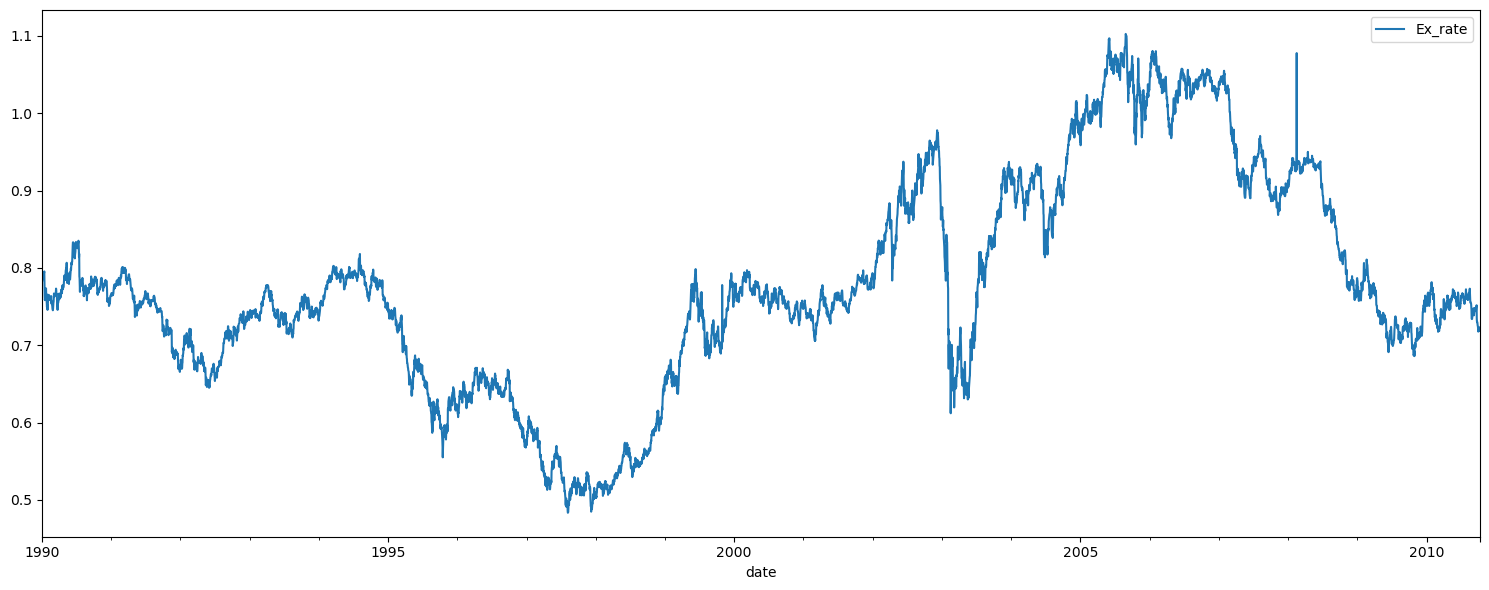

In [22]:
data1.plot(figsize=(15,6))
plt.tight_layout()
plt.show()

In [24]:
data1.isna().sum()

Ex_rate    0
dtype: int64

In [27]:
data1[data1.duplicated(keep=False)]

,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.781800
1990-01-03,0.786700
1990-01-04,0.786000
1990-01-06,0.786600
...,...
2010-10-05,0.718701
2010-10-06,0.718494
2010-10-07,0.721839


In [29]:
data1.index.duplicated().sum()

0

In [30]:
data=data1.sort_index()
data

,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.781800
1990-01-03,0.786700
1990-01-04,0.786000
1990-01-05,0.784900
...,...
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197


In [31]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

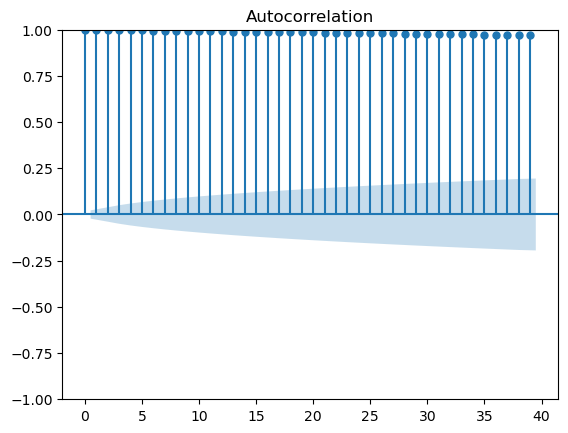

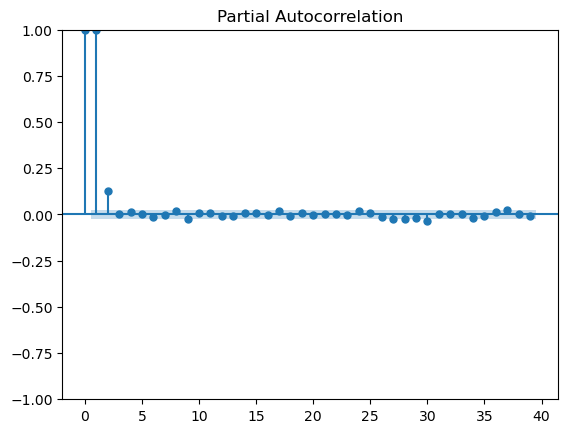

In [32]:
acf=plot_acf(data)
pacf=plot_pacf(data)

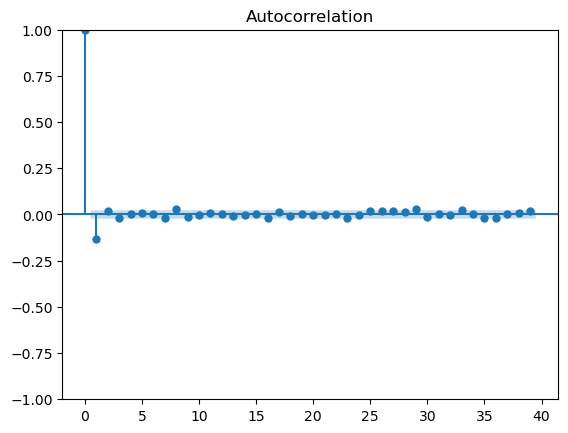

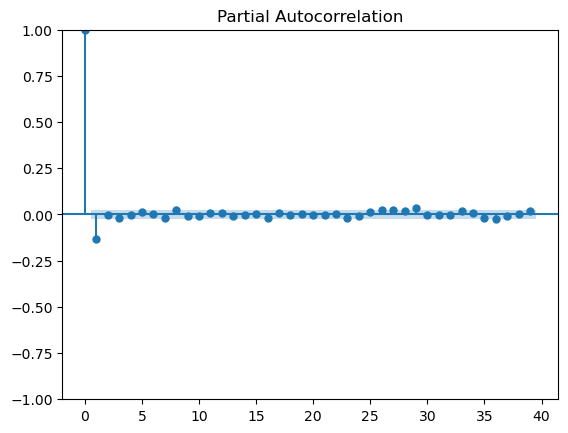

In [33]:
data_differ=data['Ex_rate'].diff().dropna()
acf1=plot_acf(data_differ)
pacf2=plot_pacf(data_differ)

In [44]:
#p,d,q
arima=ARIMA(data.Ex_rate,order=(1,1,1)).fit()
arima.summary()

C:\Users\rosha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rosha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rosha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Thu, 13 Nov 2025   AIC                         -56102.322
Time:                        12:35:29   BIC                         -56081.519
Sample:                    01-01-1990   HQIC                        -56095.182
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.000    3.58e-05    3.62e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2865078.33
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

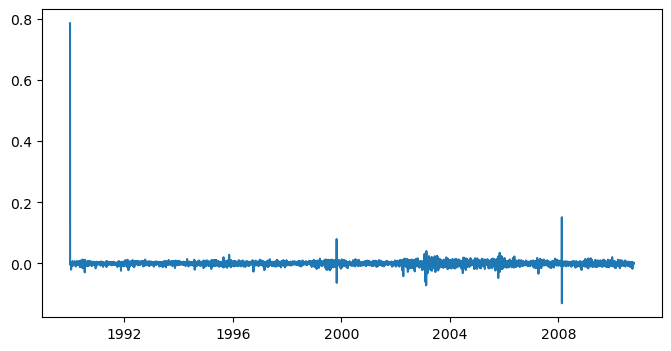

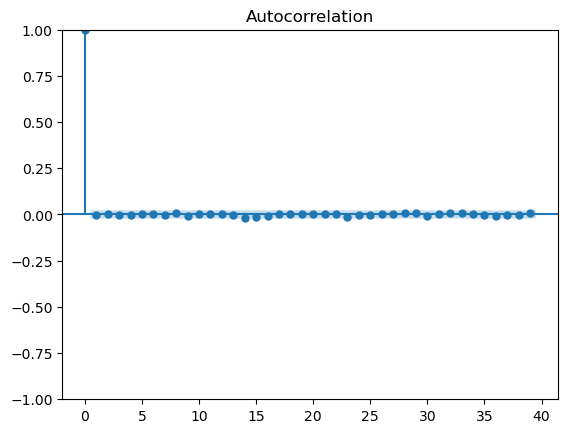

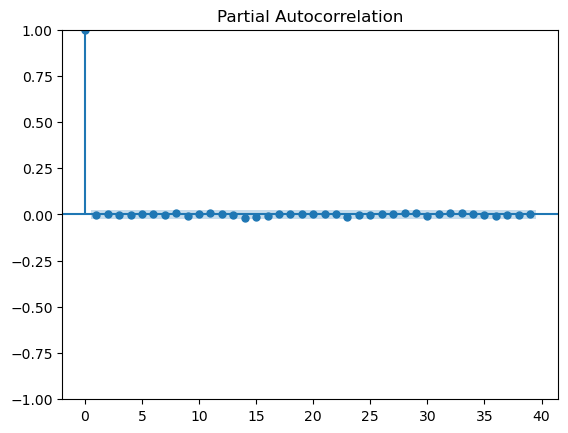

In [45]:
residuals = arima.resid
plt.figure(figsize=(8,4))
plt.plot(residuals)
acf=plot_acf(residuals)
pacf=plot_pacf(residuals)
plt.show()

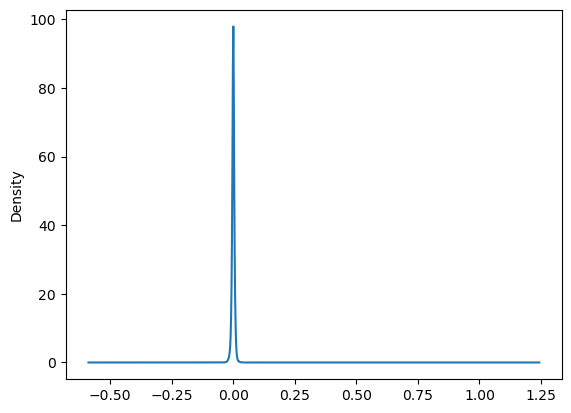

In [36]:
residuals.plot(kind='kde')
plt.show()

In [37]:
split_data=int(len(data)*0.85)
train=data.iloc[:split_data]
test=data.iloc[split_data:]
model=ARIMA(train['Ex_rate'],order=(1,1,1)).fit()
forecast=model.forecast(steps=len(test))
result=pd.DataFrame({
    'True':test['Ex_rate'],
    'Forecasted':forecast
})
result

C:\Users\rosha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rosha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rosha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


,True,Forecasted
2007-08-29,0.932618,0.930174
2007-08-30,0.932053,0.930037
2007-08-31,0.936154,0.930114
2007-09-01,0.937251,0.930071
2007-09-02,0.936988,0.930095
...,...,...
2010-10-06,0.718494,0.930086
2010-10-07,0.721839,0.930086
2010-10-08,0.723197,0.930086
2010-10-09,0.720825,0.930086


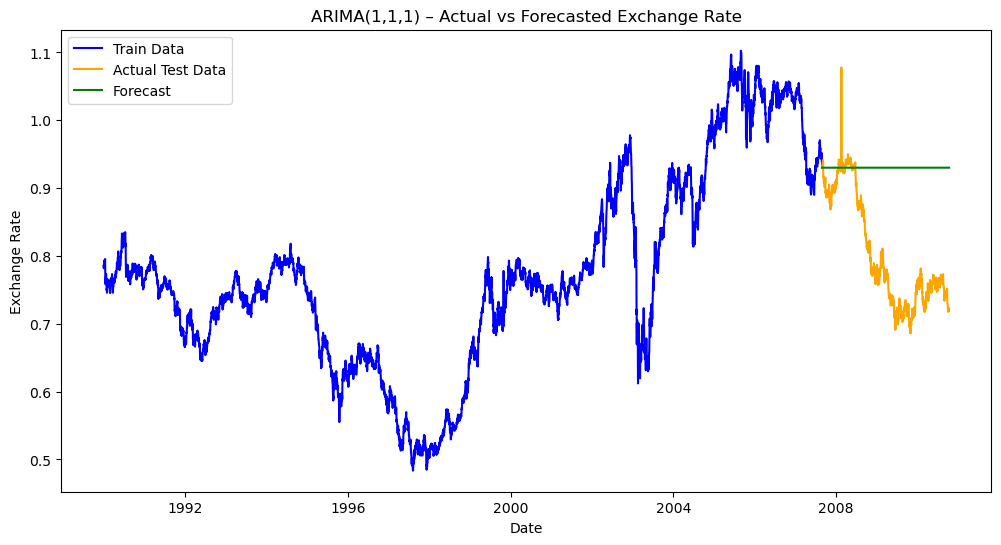

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(train['Ex_rate'], label='Train Data', color='blue')
plt.plot(test['Ex_rate'], label='Actual Test Data', color='orange')
plt.plot(forecast, label='Forecast', color='green')
plt.title("ARIMA(1,1,1) – Actual vs Forecasted Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.show()

In [39]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

holt_model = ExponentialSmoothing(train['Ex_rate'],trend='add',seasonal=None).fit(optimized=True)

print("Optimized Parameters:")
print(f"Alpha (Level): {holt_model.params['smoothing_level']:.4f}")
print(f"Beta (Trend):  {holt_model.params['smoothing_trend']:.4f}")
print(f"AIC: {holt_model.aic:.4f}")

C:\Users\rosha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Optimized Parameters:
Alpha (Level): 0.9442
Beta (Trend):  0.0000
AIC: -66663.8239


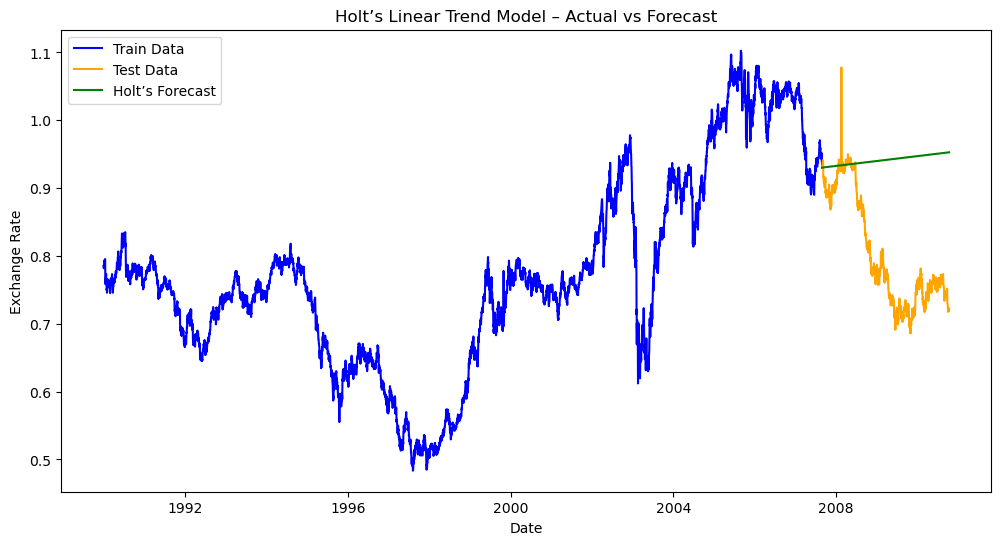

In [40]:
holt_forecast = holt_model.forecast(steps=len(test))
plt.figure(figsize=(12,6))
plt.plot(train['Ex_rate'], label='Train Data', color='blue')
plt.plot(test['Ex_rate'], label='Test Data', color='orange')
plt.plot(holt_forecast, label='Holt’s Forecast', color='green')
plt.title("Holt’s Linear Trend Model – Actual vs Forecast")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.show()

In [46]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
def calculate_errors(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mae, rmse, mape

holt_mae, holt_rmse, holt_mape = calculate_errors(test['Ex_rate'], holt_forecast)
arima_mae, arima_rmse, arima_mape = calculate_errors(test['Ex_rate'], forecast)
print(f'Holt’s Linear Trend Model MAE:{holt_mae} RMSE : {holt_rmse} MAPE :{holt_mape}')
print(f'ARIMA Model MAE:{arima_mae} RMSE : {arima_rmse} MAPE :{arima_mape}')

Holt’s Linear Trend Model MAE:0.1385694627863817 RMSE : 0.16241490986157994 MAPE :18.420139412003913
ARIMA Model MAE:0.1279096207284137 RMSE : 0.1498242845640305 MAPE :17.001613968843014
